# Аналіз оренди велосипедів

Цей набір даних  містить інформацію про попит на спільні електровелосипеди в Індії, що надаються провідним індійським постачальником мікромобільності Yulu. Ця компанія пропонує унікальні транспортні засоби для щоденних поїздок з метою усунення транспортних заторів в Індії та забезпечення безпечного, зручного та доступного рішення для пересування. Зони Yulu розташовані в оптимальних місцях, включаючи станції метро, автобусні зупинки, офісні простори, житлові райони та корпоративні офіси, щоб полегшити поїздки на перші та останні кілометри.

Останнім часом Yulu зіткнулася зі значними зниженнями доходів, тому компанія звернулася до консалтингової фірми з метою зрозуміти, від яких факторів залежить попит на ці спільні електровелосипеди, особливо на індійському ринку.

### Профіль колонок набору даних:

- **datetime**: дата та час зібрані погодинно
- **season**: сезон (1: весна, 2: літо, 3: осінь, 4: зима)
- **holiday**: чи є день святковим (витягнуто з http://dchr.dc.gov/page/holiday-schedule)
- **workingday**: якщо день не є вихідним або святковим, то позначається як 1, в іншому випадку – 0.
- **weather**:
  1. Ясно, Мало хмарно, частково хмарно
  2. Туман + Хмарно, Туман + Розірвані хмари, Туман + Мало хмарно, Туман
  3. Легкий сніг, Легкий дощ + Гроза + Розсіяні хмари, Легкий дощ + Розсіяні хмари
  4. Сильний дощ + Крижані кулі + Гроза + Туман, Сніг + Туман
- **temp**: температура в градусах Цельсія
- **atemp**: як відчувається температура в градусах Цельсія
- **humidity**: вологість
- **windspeed**: швидкість вітру
- **casual**: кількість неформальних користувачів
- **registered**: кількість зареєстрованих користувачів
- **count**: загальна кількість велосипедів, взятих в оренду, включаючи неформальних та зареєстрованих користувачів


Імпортуємо бібліотеки `matplotlib.pyplot`, `pandas` та seaborn


In [3]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

Завантажемо дані з файла `yulu_rental.csv` у pandas.DataFrame `df`.

In [5]:
data_path = '..//Project_2/yulu_rental.csv'
df = pd.read_csv(data_path)

Виведемо набір даних

In [7]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


Виведемо типи даних в наборі даних

In [9]:
df.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

Виведемо розмір набору даних

In [11]:
df.memory_usage() 

Index           132
datetime      87088
season        87088
holiday       87088
workingday    87088
weather       87088
temp          87088
atemp         87088
humidity      87088
windspeed     87088
casual        87088
registered    87088
count         87088
dtype: int64

In [12]:
df.memory_usage().sum()

1045188

In [13]:
total_bytes = df.memory_usage().sum()
total_megabytes = total_bytes / (1024 * 1024)
total_megabytes

0.9967689514160156

Перетворимо колонку `datetime` на тип даних `pd.datetime` - це нам доопоможе в подальшій роботі.

In [15]:
df['datetime'] = pd.to_datetime(df.datetime)

1. Виконаємо аналіз кількості зареєстрованих користувачів по дням.

In [17]:
# створюємо колонку "дата" (без часу)
df['date'] = df.datetime.dt.date

In [18]:
df_registered_by_date = df.groupby('date', as_index=False)['registered'].sum()
df_registered_by_date

,date,registered
0,2011-01-01,654
1,2011-01-02,670
2,2011-01-03,1229
3,2011-01-04,1454
4,2011-01-05,1518
...,...,...
451,2012-12-15,4280
452,2012-12-16,3248
453,2012-12-17,4373
454,2012-12-18,5124


1. Побудуємо графік розподілу користувачів по датам

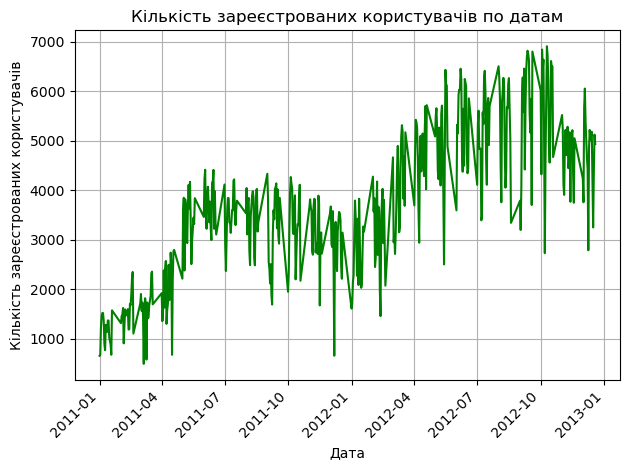

In [20]:
plt.plot(df_registered_by_date['date'], df_registered_by_date['registered'], 'g', label='Registered users')
plt.title('Кількість зареєстрованих користувачів по датам')
plt.xlabel('Дата')
plt.ylabel('Кількість зареєстрованих користувачів')
plt.grid(True)
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()

На основі побудованого графіку можна зробити висновки:
- за два роки роботи компанії (01/2011 - 01/2013) в цілому відбулося значне зростання попиту на аренду спільних електровелосипедів. Ця послуга користувалась попитом.
- за період аналізу часто відбуваються стрибки зростання та падіння попиту на послугу. Треба виконати аналіз цих коливань користування в залежності від днів тижня, святкових днів, пори року, погоди (по факторам, що представені в таблиці). Це дасть змогу надати пояснення таким різким спадам та підйомам попиту.

2. Побудуємо графік розподілу кількості оренди велосипедів за порами року

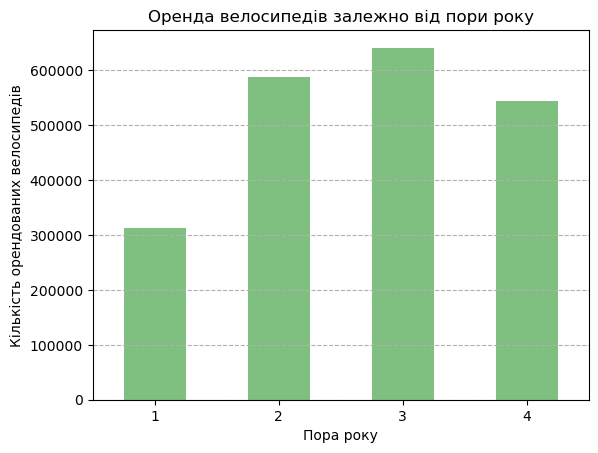

In [23]:
season_summary = df.groupby('season')['count'].sum()
season_summary.plot(kind='bar', color='green', alpha=.5)
plt.xlabel('Пора року')
plt.ylabel('Кількість орендованих велосипедів')
plt.title('Оренда велосипедів залежно від пори року')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--')

Згдіно опису до даних числові значення сезонів відповідають порам року: 1- весна, 2 - літо, 3 - осінь, 4 - зима. Виходячи з отриманих даних можна зробити висновок про настуне:

Загальний тренд:
Осінь (3-й сезон) має найвищу кількість оренд. 

Літо (2-й сезон) також показує досить високі оренди, хоча й менші за осінь. 

Зима (4-й сезон) має дещо нижчу кількість оренд, але ще достатньо високу. 

Весна (1-й сезон) має найнижчу кількість оренд.

Спираючись на дані про погоду характерну для певної пори року в Індії, де працює компанія, ці дані логічні. Згідно проведеного аналізу інформації про погоду найкращий час для велосипедних подорожей в Індії: зима (листопад - лютий) та осінь (жовтень - листопад), коли температура комфортна і мінімум опадів; весна може бути хорошим часом для велоподорожей у гірських районах; літо через мусонні дощі не є оптимальним періодом для велосипедних подорожей у більшості регіонів Індії. Отже, можемо зробити висновки: Осінь та літо є найкращими сезонами для велоподорожей в Індії, і це підтверджує високий рівень оренди велосипедів в осінньому сезоні (3-й сезон), а також у літній період. Зима також є досить сприятливою для використання велосипедів завдяки м'якшій температурі, що підтримує досить високий рівень оренди. Весна, ймовірно, є менш популярним періодом для оренди велосипедів через високу температуру та вологість у багатьох регіонах, що логічно призводить до низького рівня оренд у цей період.

3. Побудуємо  графік розсіювання між температурою і тим, як вона відчувається (atemp). Проаналізуємо отриману візуалізацію.

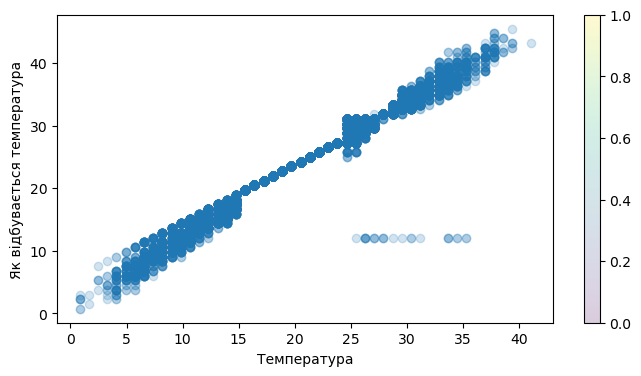

In [26]:
col_x = 'temp'
col_y = 'atemp'

plt.figure(figsize=(8,4))
plt.scatter(df[col_x], df[col_y], alpha=0.2)
plt.xlabel('Температура')
plt.ylabel('Як відбувається температура')
plt.colorbar();

Згідно отриманого графіку можна зробити висновик про те, що майже завжди показники температури і те, як вона відчувається, мають незначні відхилення або збігаються. Але є певні значення, які випадають із загальної картини та потребують детальнішого аналізу погодних факторів, що впливають на показники. 

4. Проведемо аналіз загальної кількості зареєстрованих користувачів за різними погодними умовами.

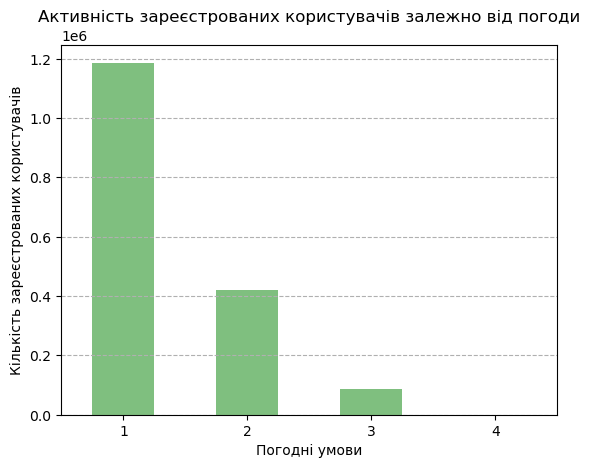

In [29]:
weather_summary = df.groupby('weather')['registered'].sum()
weather_summary.plot(kind='bar', color='green', alpha=.5)
plt.xlabel('Погодні умови')
plt.ylabel('Кількість зареєстрованих користувачів')
plt.title('Активність зареєстрованих користувачів залежно від погоди')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--')

Ця побудована візуалізація дійсно має логічний сенс з точки зору опису даних. Ми чітко візуально можемо побачити та зробити висновки про пряму залежність ативності користувачів від погодних умов. За гарної погоди (1) кількість користувачів зростає в рази, порівняно з іншими погодними умовами.

5. Побудуємо діаграму розсіювання (scatter plot) між вологістю і кількістю зареєстрованих користувачів. 

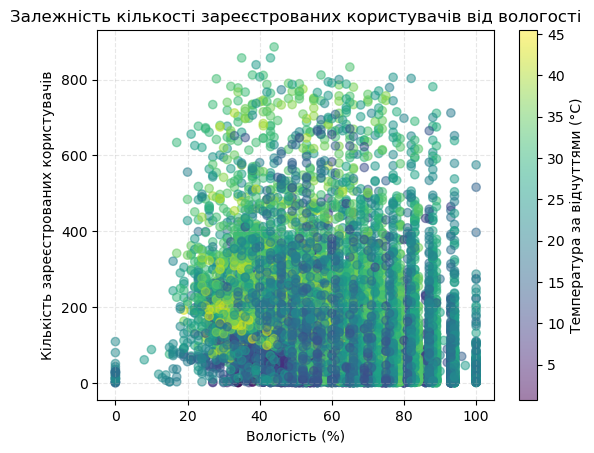

In [32]:
scatter = plt.scatter(df['humidity'], df['registered'], c=df['atemp'], cmap='viridis', alpha=.5)
plt.title('Залежність кількості зареєстрованих користувачів від вологості')
plt.xlabel('Вологість (%)')
plt.ylabel('Кількість зареєстрованих користувачів')
plt.colorbar(label='Температура за відчуттями (°C)')
plt.grid(alpha=0.3, linestyle='--')

На основі отриманого графіка можна зробити висновки:
- наявний зв'язок між вологістю та кількістю користувачів. Найбільша активність зареєстрованих користувачів спостерігається при вологості 20-80%, потім вона зменшується при високій вологості (>80%), найменша активність користувачів при вологості 0-20%.
- колір діаграми. Жовті точки, що відповідають високій температурі, найбільше спостерігаються при середній вологості (40–60%) і високій активності (400+ користувачів). Фіолетові точки, що відповідають низькій температурі, найбільше концентруються ближче до нижніх значень кількості користувачів (0-200). Це є свідчення зменьшення активності за холодної погоди.
- наійбільше скупчення точок знаходиться в діапазоні значень вологості 40-70%, свідчить, що такі погодні умови є найпоширенішими.
на графіку наявні точки з низькою вологістю (0–10%) та майже нульовою активністю), це можуть бути помилки збору даних або пов'язано з незвичними погодними умовами.
- на графіку наявні точки в діапазоні високої вологості (>80%) із несподівано високою активністю, це може свідчити по особливі дні. Висновки: Найактивніші користувачі зафіксовані при середній вологості та комфортній температурі. Висока чи низька вологість знижує активність користувачів. Залежність між вологістю і кількістю користувачів є слабкою, але помітно, що комфортні погодні умови впливають на активність.

6. Побудуємо візуалізацію графіка розсіювання між змінними humidity та count, зазначивши колір точки в відповідності до значення змінної weather. 

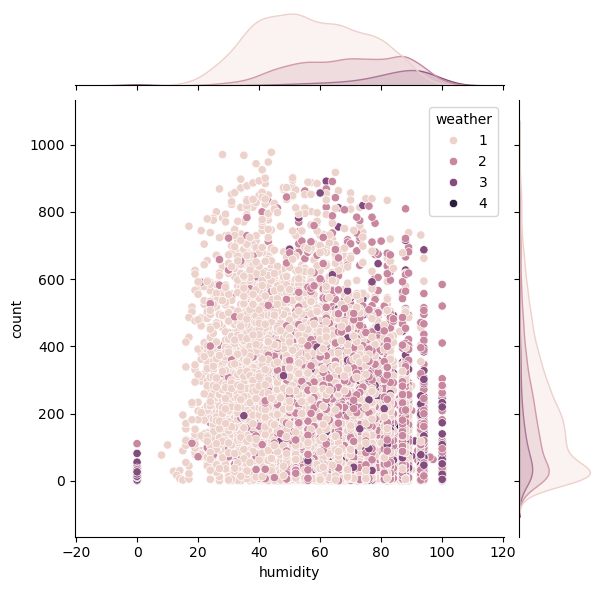

In [35]:
sns.jointplot(data=df, x="humidity", y="count", hue="weather");

Спостереження з графіку:

Загальна кількість велосипедів, взятих в оренду, включаючи неформальних та зареєстрованих користувачів: Існує широкий діапазон кількості вкористання велосипедів, який сягає від 0 до близько 800, з великою кількістю точок, що розташовані ближче до нижньої частини осі Y.

Вологість: Точки на графіку розподілені по всьому діапазону вологості від низької до 100%. Проте, здається, що немає явного тенденції, яка б вказувала на зростання або зниження загальної кількості використання велосипедів всіма користувачами залежно від рівня вологості.

Погода: Кольорове кодування вказує на погодні умови, яка варіюється від показника 1 до показника 4. Можна побачити, що при погодних умовах з категорії "1" (Ясно, Мало хмарно, частково хмарно) загальна кількість використання велосипедів всіма користувачами здається більшою, особливо в діапазоні від 20% до 60% вологості.

Концентрація точок: Є деяка концентрація точок у середньому діапазоні вологості, що може свідчити про популярніші умови для велосипедних поїздок.

З цих спостережень можна зробити припущення, що попит на велосипеди не є прямо залежним від вологості, але певні умови, які включають комфортні погодні умови, впливають на активність користувачів.

7. Побудуємо візуалізацію графіка розсіювання між змінними casual та registered, зазначивши колір точки в відповідності до значення змінної season. 

In [38]:
# відфільтруємо і збережемо в окремій змінній лише дані з сезонів "весна" і "літо" 
spring_summer_season = df[(df['season'] == 1) | (df['season'] == 2)]

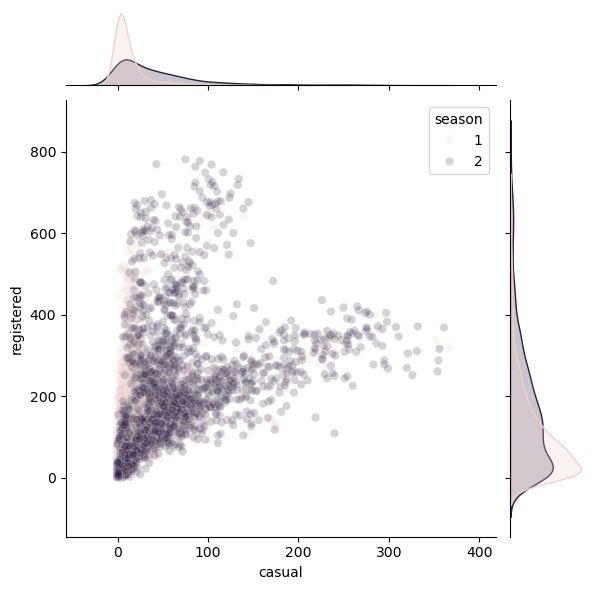

In [39]:
sns.jointplot(data=spring_summer_season, x="casual", y="registered", hue="season", alpha=.2)

Спостереження з графіку:

- залежність casual та registered згідно розподілу точок для обох сезонів виглядає схожим, що свідчить про те, що взаємозв’язок між casual і registered незначно залежить від сезону.
- наійбільше точки сконцентровні в нижніх значеннях обох змінних, особливо коли кількість casual та registered користувачів низька.
- наявна позитивна кореляція між кількістю неформальних та зареєстрованих користувачів. Це означає, що зі збільшенням casual користувачів зазвичай збільшується і кількість registered.
- на осях графіки розподілу показують схожі за формою криві для обох змінних, із довгими "хвостами" до більших значень (marginal plots). Отже, влітку, як правило, кількість користувачів (обох категорій) трохи вища, що очікувано через сприятливі погодні умови. Позитивна кореляція свідчить про те, що велосипедний сервіс популярний серед усіх категорій користувачів незалежно від сезону, але користувачів більше у пікові моменти.

8. Побудуємо візуалізацію дослідження розподілу значень humidity в залежності від погоди (weather).

<Axes: xlabel='weather', ylabel='humidity'>

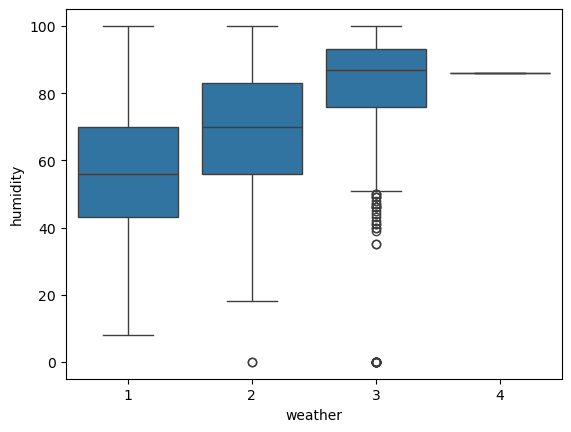

In [42]:
sns.boxplot(data=df, x="weather", y="humidity")

9. Побудуємо парні графіки розсіювання, які показуватимуть взаємозв'язки між кількістю зареєстрованих, неформальних користувачів та загальною кількістю велосипедів, взятих на прокат. Кожен графік  розрізняє робочі, вихідні та святкові дні за кольором.

In [44]:
# відфільтруємо потрібні колонки в даних
selected_data = df[['casual', 'registered', 'count', 'workingday']]

<Figure size 500x500 with 0 Axes>

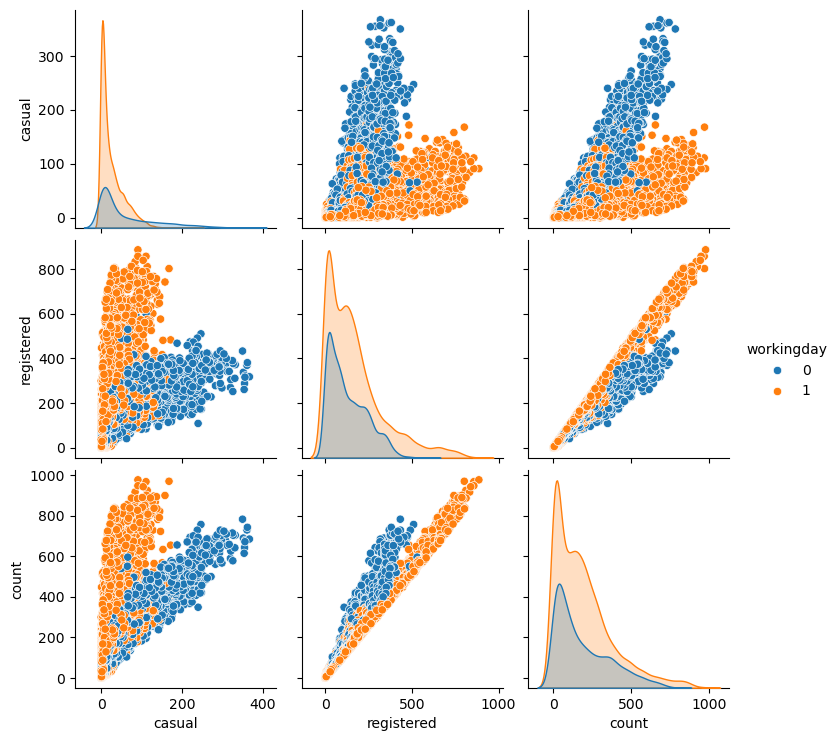

In [45]:
plt.figure(figsize=(5,5))
sns.pairplot(data=selected_data, hue="workingday");

Так, з графіків можна виявити певну особливу поведінку користувачів у святкові/вихідні дні (позначені синім). Ось основні спостереження:

- залежність між casual і registered: У святкові/вихідні дні значно більше неформальних користувачів (casual) порівняно з робочими днями. Це вказує на те, що під час святкових/вихідних днів люди, які не є постійними зареєстрованими користувачами, частіше беруть велосипеди на прокат.
- кількість прокатів count: Загальна кількість прокатів (count) у святкові/вихідні дні також значно залежить від активності неформальних користувачів. Це видно зі значного скупчення точок у діапазоні високих значень casual і середніх значень count.
- розподіл зареєстрованих користувачів registered: У святкові/вихідні дні кількість зареєстрованих користувачів суттєво зменшується порівняно з робочими днями. Зареєстровані користувачі, очевидно, більше користуються прокатом у робочі дні, ймовірно, для поїздок на роботу чи навчання.
- розподіл неформальних користувачів casual: У святкові/вихідні дні кількість неформальних користувачів різко збільшується. Це вказує на те, що люди використовують велосипеди для відпочинку чи розваг у вільний від роботи час.

    Висновок: Особливість святкових/вихідних днів: У ці дні прокат велосипедів набуває рекреаційного характеру, залучаючи більше неформальних користувачів, тоді як зареєстровані користувачі менш активні.
    
    Пропозиції для бізнесу: У святкові/вихідні дні можна пропонувати акції чи спеціальні тарифи для нових або неформальних користувачів, адже їхня активність суттєво зростає.